## Bayesian statistics (Procedure)

- **Formulate a probability model:** We define a model that describes the relationship between the data and the unknown parameters. This step requires a clear understanding of the problem and the data.

- **Decide on a prior distribution:** We specify prior distributions for the unknown parameters, which represent our initial beliefs or knowledge about the parameters before observing the data. This step allows us to incorporate prior information and make more informed decisions.

- **Observe the data and construct the likelihood function:** We observe the data and use it to update our prior beliefs about the parameters. The likelihood function represents the probability of observing the data given the parameters, and is used to update the prior distributions.

- **Determine the posterior distribution:** Using Bayes' theorem, we obtain the posterior distribution, which represents our updated beliefs about the parameters after observing the data. The posterior distribution summarizes the information from both the prior distribution and the data.

- **Summarize the posterior distribution:** We summarize the important features of the posterior distribution, such as the mean and variance, and use these summary statistics to make inferences about the unknown parameters and the problem.

## Some key concepts:

(1) Clarifying the difference between Confidence Interval and Credible Interval:


# Credible Intervals:

- Bayesian approach to interval estimation
- Based on posterior distribution of the parameter
- Range of values that contain a certain degree of posterior probability (e.g. 95%)
- More flexible and appropriate for problems with available and meaningful prior information
- Interpretation: Calculate your posterior distribution and determine the 95% credible interval. There is a 95% probability that the true parameter value lies in this interval.


# Confidence Intervals:

- Frequentist approach to interval estimation
- Based on sample statistics and assumption of normal distribution
- Range of values that are expected to contain the true population value with a certain degree of confidence (e.g. 95%)
- More widely used and appropriate for problems with limited or no prior information.
- Intepretation: Sample the population many times to create many different datasets. Calculate the 95% confidence interval on each dataset. 95% of these intervals will contain the true parameter value.

  


(2) Look the effect of likelihood with alot of data vs strong prior belief and their effect to the posterior: 

- Beta prior:how is the sample rate, alpha, and beta parameters affecting the prior as well as the ratio of a/b
    
- Likelihood:how the amount of data can influence the weight of the likelihood affects the posterior. 

# Likelhood vs Probability

Let $S$ be a random variable that models if a random CS 109B/209B student attends a section or not. $S_{i}$ is 1 if they come and 0 otherwise. 

From this setup we assume a Bernoulli model for the data. 

$$ S_{i} \sim \text{Bernoulli}(\theta) \\ $$ 

Where $i = 1, 2, ..., N$ (total student) and $\theta$ is an unknown probability either a student comes or not. So, in the next step we will assume $$\theta \sim \text{Beta}(a, b)$$

So given this,  what is the likelhood of $\theta$ given the data: 
$L(\theta \mid s_1,\ldots,s_n)$?

For a given  $\theta$ Bernoulli of data can be exprressed as:
$$P( S_i = s \mid \theta ) = p(s \mid \theta) = \theta^s (1-\theta)^{1-s}$$

Hence the likelhood becomes: 
$$L(\theta \mid s_1,\ldots,s_n) = \prod_{i=1}^n \theta^{s_i} (1-\theta)^{1-s_i} $$


Discussion Question: What similarities do you see between the P(s| $\theta$) and the likelhood?



In [1]:
#import our libraries
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

from time import sleep
from IPython.display import clear_output

In [2]:
#generate our data
np.random.seed(1)
theta_true = 0.2
n = 200 #how many students we observe each time (in each section)
num_samples = 400 #how many times we run the experiemnt (how many sections we have)
Y = np.random.binomial(n, theta_true, size=num_samples)

In [3]:
display(f'number of samples: {Y.shape[0]}')

'number of samples: 400'

In [4]:
#Some of the outputs of each experiemnt we run.
Y[:10]

array([37, 42, 41, 44, 37, 35, 32, 41, 41, 41])

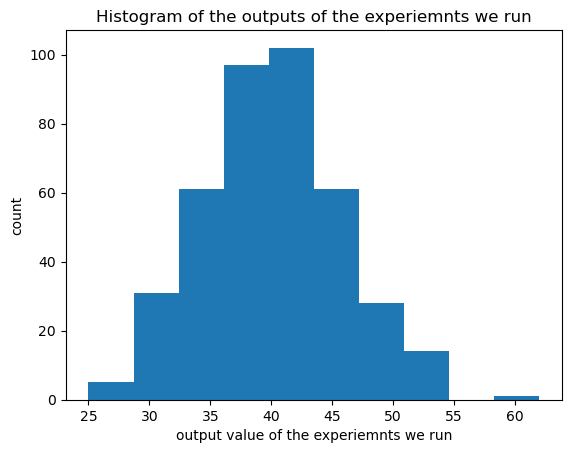

In [5]:
plt.hist(Y)
plt.title("Histogram of the outputs of the experiemnts we run")
plt.xlabel("output value of the experiemnts we run")
plt.ylabel("count");

## 1. Choose a probability model

Binomial (binomial where n=200) but $\theta$ is unknown.

Let's see what our proposed data generating distribution looks like fixing $\theta = 0.5$

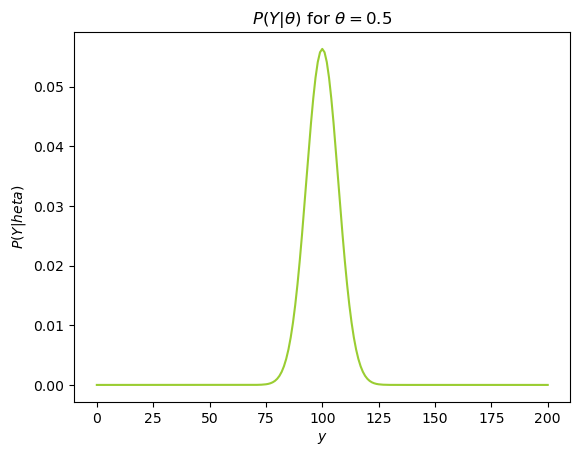

In [6]:
#stats.bernoulli.pmf(k=0, p=0.5)
y_dummy = np.arange(0, n+1)

plt.plot(y_dummy, stats.binom.pmf(k=y_dummy, n=n, p=0.5), color='yellowgreen');
plt.xlabel("$y$")
plt.ylabel("$P(Y|\theta)$")
plt.title(r"$P(Y|\theta)$ for $\theta = 0.5$");

## 2. Choose a prior

But we don't know $\theta$! So let's choose a prior distribution over the probability model's parameter.

The parameter $\theta$ can only take on real values in [0,1]. 

We'll choose a Beta distribution for the prior: it is continous with support (i.e., non-zero) on [0,1]

$$
\theta \sim Beta(\alpha, \beta)
$$
The PDF of the Beta distribution looks like:
$$
P(\theta) = \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha+\beta)}y^{\alpha-1}(1-y)^{\beta-1}
$$
But the Beta has its *own* parameters, $\alpha$ & $\beta$!\
Different parameters affect the shape of our prior.

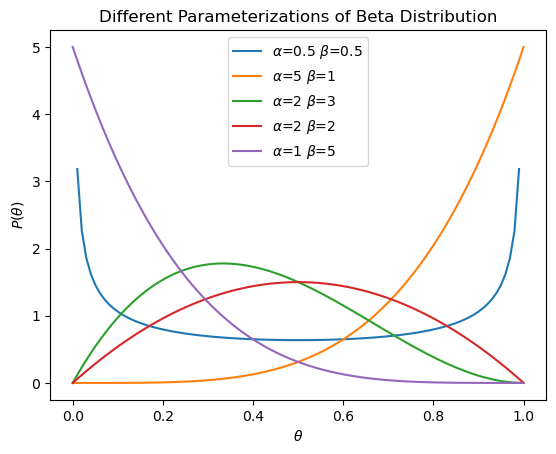

In [7]:
lin_theta = np.linspace(0, 1, 100)
alphas = [0.5, 5, 2, 2, 1]
betas = [0.5, 1, 3, 2, 5]
for alpha, beta in zip(alphas, betas):
    plt.plot(lin_theta,
             stats.beta(alpha, beta).pdf(lin_theta),
            label=rf'$\alpha$={alpha} $\beta$={beta}')
plt.title("Different Parameterizations of Beta Distribution")
plt.ylabel(r"$P(\theta)$")
plt.xlabel(r"$\theta$")
plt.legend();

How should we choose our prior's parameters? For a 'non-dogmatic' prior we might assume we want high variance on the prior distribution.

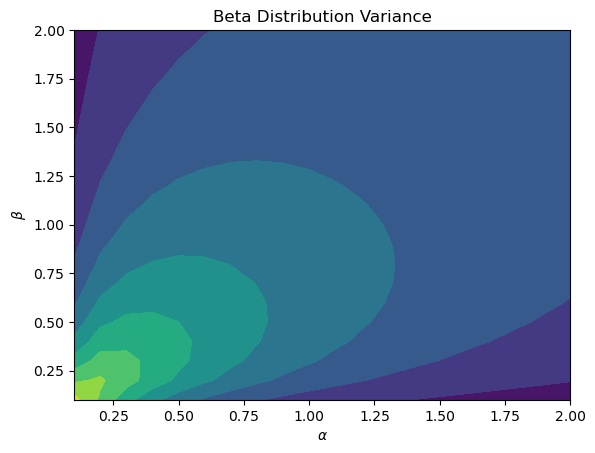

In [8]:
a = np.linspace(0.1, 2, 20)
b = np.linspace(0.1, 2, 20)
aa, bb = np.meshgrid(a, b)
Z = [stats.beta(al, be).var() for al, be in np.hstack((aa.reshape(-1,1), bb.reshape(-1,1)))]
Z= np.array(Z).reshape(20,20)
plt.contourf(a, b, Z)
plt.ylabel(r"$\beta$")
plt.xlabel(r"$\alpha$")
plt.title("Beta Distribution Variance");

It looks like a combination of low $\alpha$ and $\beta$ values will give us high variance.

But from the plot below you can see this is probably not what we want. Almost all the probability density localized around $\theta=0$ and $\theta=1$

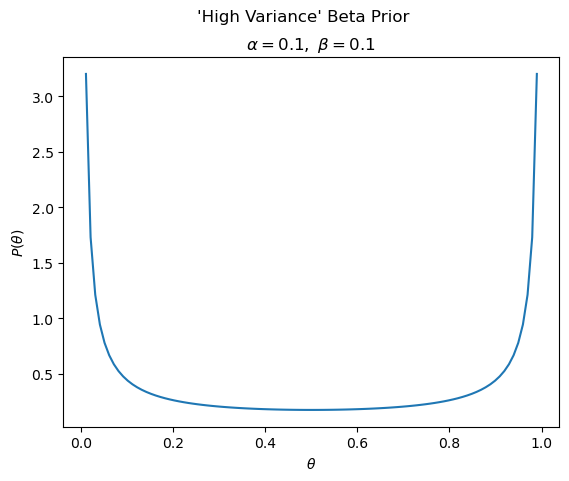

In [9]:
alpha = 0.1
beta = 0.1
plt.plot(lin_theta, stats.beta(alpha, beta).pdf(lin_theta))
plt.ylabel(r"$P(\theta)$")
plt.xlabel(r"$\theta$");
plt.title(rf"$\alpha={alpha},\ \beta={beta}$")
plt.suptitle("'High Variance' Beta Prior");

This is probably more like what we had in mind.

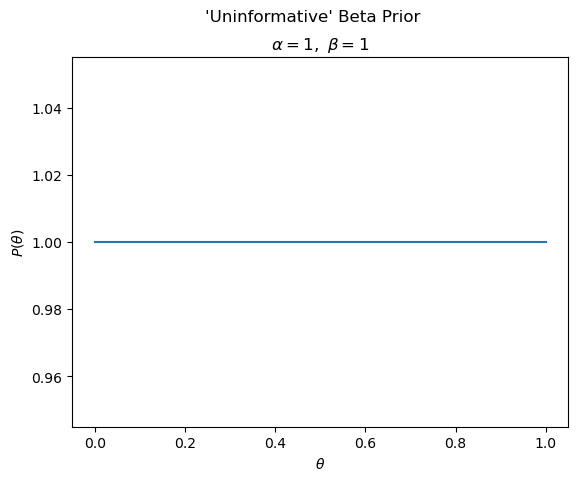

In [10]:
alpha = 1
beta = 1
plt.plot(lin_theta, stats.beta(alpha, beta).pdf(lin_theta))
plt.ylabel(r"$P(\theta)$")
plt.xlabel(r"$\theta$");
plt.title(r"$\alpha=1,\ \beta=1$")
plt.suptitle("'Uninformative' Beta Prior");

## 3. Calculate the likelihood


$$
\mathcal{L}(\theta;y_i) = {n \choose y}\theta^{y_i} (1-\theta)^{n-y_i}
$$

The joint likelihood, assuming independence of observations would then be:

$$
\mathcal{L}(\theta;Y) = \prod\limits_{i=1}^N{n \choose y}\theta^{y_i} (1-\theta)^{n-y_i}
$$
Often we work with the log-likelihood as this has nice computational properties (products turn into sums).
$$
\begin{aligned}
\ell(\theta;Y) &= \log\prod\limits_{i=1}^N{n \choose y}\theta^{y_i} (1-\theta)^{n-y_i}\\
&= \sum\limits_{i=1}^N \log{n \choose y}+y_i\log(\theta)+(n-y_i)\log(1-\theta)
\end{aligned}
$$

Scypi has helpful `logpmf` and `logpdf` functions distributions. 

In [11]:
# log-likelihood of all observed data for theta=0.5
np.sum(stats.binom.logpmf(Y, n=n, p=0.5))

-16597.10534125655

Try doing the same thing with the original likelihood function (i.e., with the product). What does wrong here?

In [12]:
# likelihood of all observed data for theta=0.5
# oops!
np.prod(stats.binom.pmf(Y, n=n, p=0.5))

0.0

We can calculate the log-likelihood of the data for different candidate $\theta$ values.

In [13]:
# log-likelihoods of data for 100 thetas in the range [0, 1]
np.array([np.sum(stats.binom.pmf(Y, n=n, p=theta)) for theta in np.linspace(0,1,100)])

array([0.00000000e+000, 1.97230361e-019, 1.11008411e-012, 4.66613356e-009,
       1.03057341e-006, 4.57052057e-005, 7.46437786e-004, 6.26168235e-003,
       3.31145783e-002, 1.26029498e-001, 3.75874294e-001, 9.27304251e-001,
       1.96064529e+000, 3.64208141e+000, 6.05125406e+000, 9.10489353e+000,
       1.25078673e+001, 1.57766454e+001, 1.83595636e+001, 1.98137659e+001,
       1.99465400e+001, 1.88476860e+001, 1.68140712e+001, 1.42280723e+001,
       1.14547029e+001, 8.78499922e+000, 6.41815365e+000, 4.46413928e+000,
       2.95531043e+000, 1.86367826e+000, 1.12253422e+000, 6.49007814e-001,
       3.62807013e-001, 1.97789269e-001, 1.05968644e-001, 5.60168049e-002,
       2.91639102e-002, 1.48456418e-002, 7.31213308e-003, 3.44726161e-003,
       1.54103980e-003, 6.48495386e-004, 2.55543134e-004, 9.39449872e-005,
       3.21362985e-005, 1.02093034e-005, 3.00759635e-006, 8.20549135e-007,
       2.07073256e-007, 4.82775449e-008, 1.03849144e-008, 2.05816679e-009,
       3.75228668e-010, 6

Let's plot the log-likelihood of our data as a function of $\theta$ with a twist:\
Each plot update will include *more* observations. That is, more terms in the sum.

Notice how the shape of the log-likelihood changes as we observe more data.

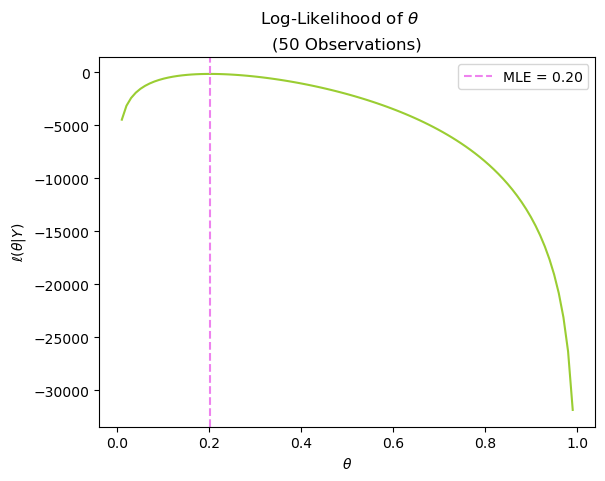

In [18]:
plt.ion()
for N in [1,2,50]:
    clear_output(wait=True)
    log_likelihoods =  np.array([np.sum(stats.binom.logpmf(Y[:N], n=n, p=theta)) for theta in lin_theta])
    plt.plot(lin_theta, log_likelihoods, color='yellowgreen')
    mle = lin_theta[log_likelihoods.argmax()]
    plt.axvline(mle, c='violet', ls='--', label=f"MLE = {mle:.2f}")
    plt.xlabel(rf'$\theta$')
    plt.ylabel(rf'$\ell(\theta|Y)$')
    plt.title(rf"({N:,} Observation{'s'*(N>1)})");
    plt.legend()
    plt.suptitle(rf"Log-Likelihood of $\theta$")
    plt.show()
    sleep(2)

## 4. Calculate the (unnormalized) posterior


$$
\begin{aligned}
P(\theta|Y) \propto \mathcal{L}(\theta;Y)P(\theta)&= \prod\limits_{i=1}^N{n \choose y}\theta^{y_i} (1-\theta)^{n-y_i}\frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha+\beta)}\theta^{\alpha-1}(1-\theta)^{\beta-1}\\
&\propto \prod\limits_{i=1}^N\theta^{y_i} (1-\theta)^{n-y_i}\theta^{\alpha-1}(1-\theta)^{\beta-1}\\
&\propto \theta^{\sum y_i+\alpha-1} (1-\theta)^{N - \sum y_i + \beta-1}
\end{aligned}
$$

You can see this is actually the 'kernel' of a Beta distribution (i.e., no normalizing constant)
$$
Beta\bigg(a+\sum\limits_{i=1}^n y_i, \beta+N-\sum y_i\bigg)
$$

We can also calculate the (log) unormalized posterior by simply summing the log-likelihood and log-priors.

/Users/kimonaristotelisvogt/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:645: RuntimeWarning: divide by zero encountered in _beta_pdf
  return _boost._beta_pdf(x, a, b)


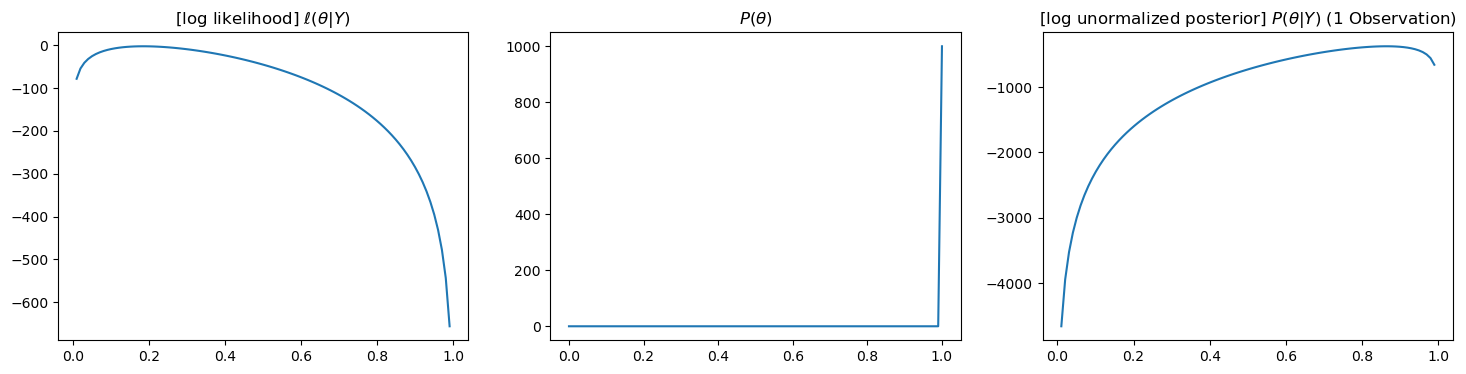

In [15]:
#Heavily influenced by prior
# Prior Parameters
alpha = 1000
beta = 1
# Number of observations to consider
N = 1

def log_likelihood(Y, theta):
    return np.sum(stats.binom(n, p=theta).logpmf(Y))

def log_prior(theta):
    return stats.beta(alpha, beta).logpdf(theta)

def posterior(Y, theta):
    return log_likelihood(Y, theta) + log_prior(theta)

# points from posterior to plot
post_points = [posterior(Y[:N], theta) for theta in np.linspace(0,1,100)]

fig, axs = plt.subplots(1,3, figsize=(18,4))

log_likelihoods =  np.array([np.sum(stats.binom.logpmf(Y[:N], n=n, p=theta)) for theta in lin_theta])
axs[0].plot(np.linspace(0,1,100), log_likelihoods)
axs[0].set_title(r"[log likelihood] $\ell(\theta|Y)$")
axs[1].plot(np.linspace(0,1,100), stats.beta(alpha, beta).pdf(np.linspace(0,1,100)))
axs[1].set_title(r"$P(\theta)$")
axs[2].plot(np.linspace(0,1,100), post_points)
axs[2].set_title(rf"[log unormalized posterior] $P(\theta|Y)$ ({N} Observation{'s'*(N>1)})");

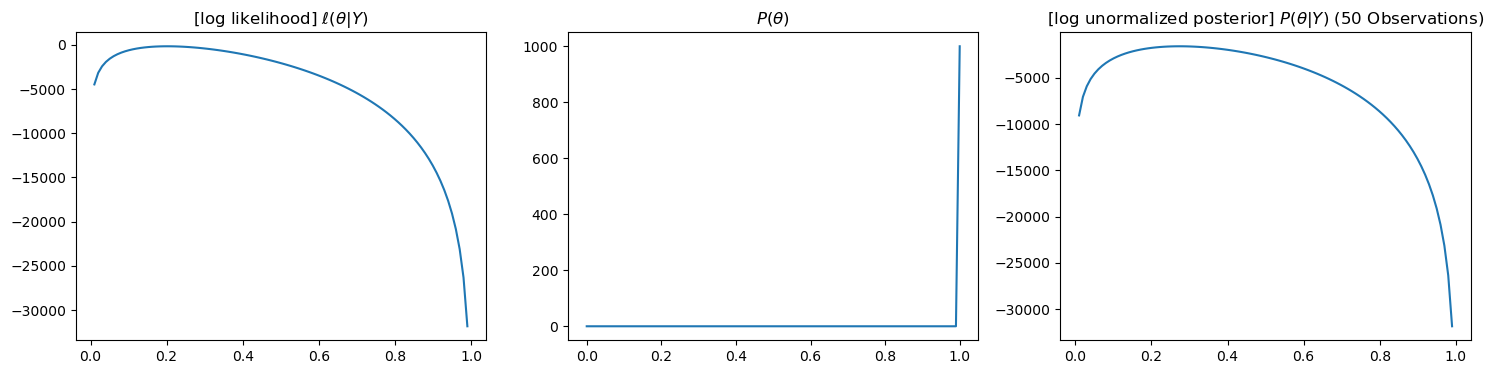

In [22]:
#Heavily influenced by large amount of samples
# Prior Parameters
alpha = 1000
beta = 1
# Number of observations to consider
N = 50

def log_likelihood(Y, theta):
    return np.sum(stats.binom(n, p=theta).logpmf(Y))

def log_prior(theta):
    return stats.beta(alpha, beta).logpdf(theta)

def posterior(Y, theta):
    return log_likelihood(Y, theta) + log_prior(theta)

# points from posterior to plot
post_points = [posterior(Y[:N], theta) for theta in np.linspace(0,1,100)]

fig, axs = plt.subplots(1,3, figsize=(18,4))

log_likelihoods =  np.array([np.sum(stats.binom.logpmf(Y[:N], n=n, p=theta)) for theta in lin_theta])
axs[0].plot(np.linspace(0,1,100), log_likelihoods)
axs[0].set_title(r"[log likelihood] $\ell(\theta|Y)$")
axs[1].plot(np.linspace(0,1,100), stats.beta(alpha, beta).pdf(np.linspace(0,1,100)))
axs[1].set_title(r"$P(\theta)$")
axs[2].plot(np.linspace(0,1,100), post_points)
axs[2].set_title(rf"[log unormalized posterior] $P(\theta|Y)$ ({N} Observation{'s'*(N>1)})");